In [7]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [3]:
df=pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.shape

(14999, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [13]:
df.Department.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [14]:
df.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [15]:
#Both these need to be one-hot encoded

df1=pd.get_dummies(data=df, columns=['Department', 'salary'])
df1.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department_IT', 'Department_RandD',
       'Department_accounting', 'Department_hr', 'Department_management',
       'Department_marketing', 'Department_product_mng', 'Department_sales',
       'Department_support', 'Department_technical', 'salary_high',
       'salary_low', 'salary_medium'],
      dtype='object')

In [18]:
df2=df.drop(labels=['Department', 'salary'], axis=1)
df2.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years'],
      dtype='object')

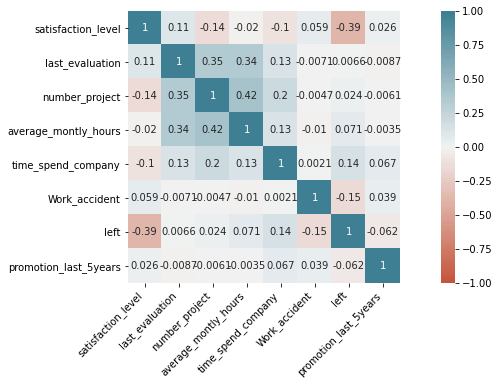

In [47]:
#building correlation matrix to determine the impact of variables on retention ('left' column)

corr=df2.corr()
plt.figure(figsize=(15,5))
ax=sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True, annot=True)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

#time spent in company and satisfaction level are strongly correlated to leaving factor

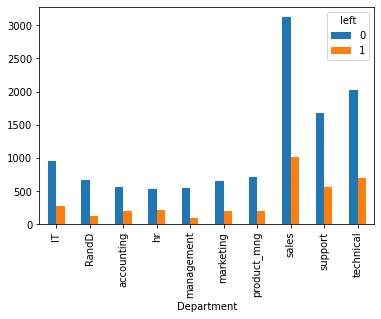

In [45]:
pd.crosstab(df.Department, df.left).plot(kind='bar')
#Dept doesnt seem to have a high impact on retention

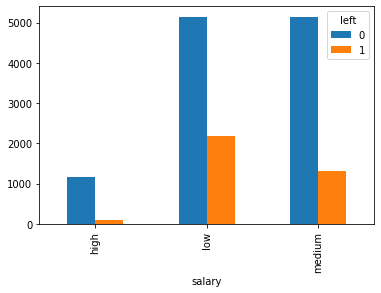

In [44]:
#The ones with high salary tend to leave less

pd.crosstab(df.salary,df.left).plot(kind='bar')

Salary and satisfaction levels will serve as independent variables

In [59]:
subdf = df[['satisfaction_level','salary']]
subdf.head()


,satisfaction_level,salary
0,0.38,low
1,0.80,medium
2,0.11,medium
3,0.72,low
4,0.37,low


In [67]:
#One Hot Encoding required for salary

salary_dummies=pd.get_dummies(subdf.salary, prefix='salary')
df_dum=pd.concat([subdf, salary_dummies], axis='columns')
df_dum.drop(labels=['salary'], axis=1, inplace=True)
df_dum.head()

,satisfaction_level,salary_high,salary_low,salary_medium
0,0.38,0,1,0
1,0.80,0,0,1
2,0.11,0,0,1
3,0.72,0,1,0
4,0.37,0,1,0


In [68]:
X=df_dum
Y=df.left

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=0.2)
#Building a test size of 20%

In [71]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [72]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [73]:
model.predict(X_test)

array([0, 0, 1, ..., 0, 1, 0])

In [76]:
#Accuracy
model.score(X_test, y_test)

0.7826666666666666